In [1]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
import numpy as np

train1 = "Data/readelf/train_dataset1.npz"
train2 = "Data/readelf/train_dataset2.npz"
val = "Data/readelf/val_dataset.npz"
test = "Data/readelf/test_dataset.npz"

# Load numpy array
training_dataset1 = np.load(train1)
training_dataset2 = np.load(train2)
val_dataset = np.load(val)
test_dataset = np.load(test)

x_train = np.concatenate((training_dataset1['x'], training_dataset2['x']))[:5408]
y_train = np.concatenate((training_dataset1['y'], training_dataset2['y']))[:5408]

# Swap val and test
x_test = val_dataset['x']
y_test = val_dataset['y']

x_val = test_dataset['x'][:896]
y_val = test_dataset['y'][:896]

print("No. of dataset collected: 28")
print("No limit set for data collection except skip random no of files up to 5")
print("Training shape: ", x_train.shape, y_train.shape)
print("Validation shape: ", x_val.shape, x_val.shape)
print("Test shape: ", x_test.shape, y_test.shape)

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


No. of dataset collected: 28
No limit set for data collection except skip random no of files up to 5
Training shape:  (5408, 3840, 64) (5408, 3840, 64)
Validation shape:  (896, 3840, 64) (896, 3840, 64)
Test shape:  (2278, 3840, 64) (2278, 3840, 64)


In [2]:
# Base model
model = Sequential()
model.add(LSTM(64, input_shape=(3840, 64), return_sequences=True))
model.add(Dense(64, activation='sigmoid'))
model.summary()
adam = Adam(lr=0.00005)
model.compile(optimizer=adam, loss='mean_absolute_error', metrics=['mae', 'mse'])

# Fitting the model
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    shuffle=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3840, 64)          33024     
_________________________________________________________________
dense_1 (Dense)              (None, 3840, 64)          4160      
Total params: 37,184
Trainable params: 37,184
Non-trainable params: 0
_________________________________________________________________
Train on 5408 samples, validate on 896 samples
Epoch 1/50
5408/5408 [==============================] - 1000s 185ms/step - loss: 0.4871 - mean_absolute_error: 0.4871 - mean_squared_error: 0.2394 - val_loss: 0.4644 - val_mean_absolute_error: 0.4644 - val_mean_squared_error: 0.2206
Epoch 2/50
5408/5408 [==============================] - 928s 172ms/step - loss: 0.3241 - mean_absolute_error: 0.3241 - mean_squared_error: 0.1233 - val_loss: 0.2202 - val_mean_absolute_error: 0.2202 - val_mean_squared_error: 0.0629
Epoch 3/50
5408/5408 [

5408/5408 [==============================] - 918s 170ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_squared_error: 0.0179 - val_loss: 0.0167 - val_mean_absolute_error: 0.0167 - val_mean_squared_error: 0.0157
Epoch 34/50
5408/5408 [==============================] - 899s 166ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_squared_error: 0.0179 - val_loss: 0.0166 - val_mean_absolute_error: 0.0166 - val_mean_squared_error: 0.0157
Epoch 35/50
5408/5408 [==============================] - 905s 167ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_squared_error: 0.0179 - val_loss: 0.0166 - val_mean_absolute_error: 0.0166 - val_mean_squared_error: 0.0157
Epoch 36/50
5408/5408 [==============================] - 881s 163ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_squared_error: 0.0179 - val_loss: 0.0165 - val_mean_absolute_error: 0.0165 - val_mean_squared_error: 0.0157
Epoch 37/50
5408/5408 [==============================] - 867s 160ms/step - loss:

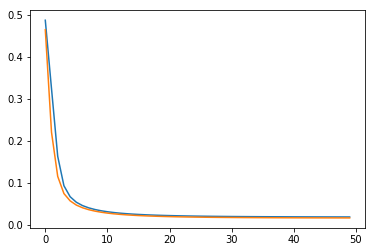

In [3]:
from matplotlib import pyplot
%matplotlib inline

# plot metrics
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])

In [4]:
test_loss = model.evaluate(x_test, y_test)

print("Test loss:", test_loss)

2278/2278 [==============================] - 82s 36ms/step
Test loss: [0.019452046196124024, 0.019452047376196196, 0.01920869672796153]


In [5]:
predictions = model.predict(x_test)
print(np.argmax(predictions[0][0]))
print(predictions[0][0])
print(predictions[0][1])
print(predictions[0][2])
print(predictions[0][3])
print(predictions[0][4])
print(predictions[1][0])
print(predictions[1][1])
print(predictions[1][2])
print(predictions[1][3])
print(predictions[1][4])

15
[0.02259866 0.02244423 0.02446855 0.01174372 0.02425988 0.02601697
 0.03018723 0.02878637 0.02434062 0.0290934  0.02256729 0.01727344
 0.0149908  0.02444302 0.0204846  0.04039619 0.02539571 0.02832797
 0.02906331 0.02661638 0.01932438 0.03491028 0.02750013 0.02091917
 0.02481431 0.01903054 0.02821853 0.0319971  0.01492403 0.01564083
 0.02510514 0.02349243 0.03090925 0.02267551 0.02414665 0.02364828
 0.02495493 0.0290453  0.01565789 0.01501844 0.03241829 0.01559309
 0.02353551 0.01657164 0.01951363 0.02536671 0.02615028 0.02373122
 0.02664093 0.01824579 0.02367322 0.02514883 0.02450225 0.02833408
 0.02788492 0.01823691 0.02758023 0.03011452 0.02539704 0.02094792
 0.02807122 0.0180523  0.0243539  0.02070882]
[0.00951941 0.00777281 0.01089209 0.00490356 0.01049751 0.01216136
 0.01310169 0.01222849 0.01018134 0.009613   0.01120137 0.00718602
 0.00533361 0.01022918 0.00764832 0.0142453  0.01041134 0.01081686
 0.00920606 0.00979189 0.00802181 0.01374868 0.01249845 0.00876599
 0.01019493 0